 # problem statement

Financial markets are influenced by complex patterns. This project aims to
*predict the closing price* of a specific stock using *historical data* and
machine learning models. The model should help identify trends  and  make 
informed investment decisions

 ## goals 

* Download historical stock price data (Open, High, Low, Close, Volume).
* Build ML and deep learning models to predict future prices.
* Visualize price trends and predictions.


###  required library 

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("C:/Users/Sanjay  Bela/OneDrive/Desktop/stockp.csv")
df

,date,1. open,2. high,3. low,4. close,5. volume
0,2025-06-02,167.84,169.8700,167.3900,169.030,36963138.0
1,2025-05-30,171.35,172.2050,167.4400,171.740,52639911.0
2,2025-05-29,174.00,174.4193,170.6300,171.860,29373803.0
3,2025-05-28,173.16,175.2650,171.9107,172.360,34783997.0
4,2025-05-27,170.16,173.1700,170.0000,172.900,37995670.0
...,...,...,...,...,...,...
5225,2004-08-25,104.76,108.0000,103.8800,106.000,9188600.0
5226,2004-08-24,111.24,111.6000,103.5700,104.870,15247300.0
5227,2004-08-23,110.76,113.4800,109.0500,109.400,18256100.0
5228,2004-08-20,101.01,109.0800,100.5000,108.310,22834300.0


 #### data view & exploring data 
   
   

In [3]:
print(df.head())
print(df.tail())
print("info")




         date  1. open   2. high    3. low  4. close   5. volume
0  2025-06-02   167.84  169.8700  167.3900    169.03  36963138.0
1  2025-05-30   171.35  172.2050  167.4400    171.74  52639911.0
2  2025-05-29   174.00  174.4193  170.6300    171.86  29373803.0
3  2025-05-28   173.16  175.2650  171.9107    172.36  34783997.0
4  2025-05-27   170.16  173.1700  170.0000    172.90  37995670.0
            date  1. open  2. high  3. low  4. close   5. volume
5225  2004-08-25   104.76   108.00  103.88   106.000   9188600.0
5226  2004-08-24   111.24   111.60  103.57   104.870  15247300.0
5227  2004-08-23   110.76   113.48  109.05   109.400  18256100.0
5228  2004-08-20   101.01   109.08  100.50   108.310  22834300.0
5229  2004-08-19   100.01   104.06   95.96   100.335  44659000.0
info


In [4]:
print(df.info())
print("describe")
print(df.describe())
print("shape")
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5230 entries, 0 to 5229
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       5230 non-null   object 
 1   1. open    5230 non-null   float64
 2   2. high    5230 non-null   float64
 3   3. low     5230 non-null   float64
 4   4. close   5230 non-null   float64
 5   5. volume  5230 non-null   float64
dtypes: float64(5), object(1)
memory usage: 245.3+ KB
None
describe
           1. open      2. high       3. low     4. close     5. volume
count  5230.000000  5230.000000  5230.000000  5230.000000  5.230000e+03
mean    764.362832   771.986279   756.352286   764.304872  9.752536e+06
std     612.965695   619.084794   606.432100   612.890059  1.207176e+07
min      85.400000    86.520000    83.340000    83.430000  4.656380e+05
25%     399.352500   404.922500   392.805000   398.332500  1.813900e+06
50%     585.445000   589.000000   579.150000   583.989950  4.569500e+06
75

In [5]:
print("index")
print(df.index)
print("data types")
print(df.dtypes)

index
RangeIndex(start=0, stop=5230, step=1)
data types
date          object
1. open      float64
2. high      float64
3. low       float64
4. close     float64
5. volume    float64
dtype: object


In [6]:
print("shape")
print(df.shape)
print("columns")
print(df.columns)
print("null values")
print(df.isnull().sum())


shape
(5230, 6)
columns
Index(['date', '1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')
null values
date         0
1. open      0
2. high      0
3. low       0
4. close     0
5. volume    0
dtype: int64


 #### data cleaning

In [7]:
print(df.dropna(inplace=True))
df = df.rename(columns={'1. open':'open','2. high':'high','3. low':'low','4. close':'close','5. volume':'volume'	})


None


In [8]:
df.reset_index(drop=True, inplace=True)
df.fillna(value=0,inplace=True)
print(df.duplicated())


0       False
1       False
2       False
3       False
4       False
        ...  
5225    False
5226    False
5227    False
5228    False
5229    False
Length: 5230, dtype: bool


In [9]:
df['date'] = pd.to_datetime(df['date'])

#### feature construction

In [10]:
df['daily_return'] = df['close'].pct_change()#perchantage change between two row current and previous
df['moving_avg_20'] = df['close'].rolling(window=20).mean()#20 day moving average
df['volatility_20'] = df['daily_return'].rolling(window=20).std()
df

,date,open,high,low,close,volume,daily_return,moving_avg_20,volatility_20
0,2025-06-02,167.84,169.8700,167.3900,169.030,36963138.0,NaN,NaN,NaN
1,2025-05-30,171.35,172.2050,167.4400,171.740,52639911.0,0.016033,NaN,NaN
2,2025-05-29,174.00,174.4193,170.6300,171.860,29373803.0,0.000699,NaN,NaN
3,2025-05-28,173.16,175.2650,171.9107,172.360,34783997.0,0.002909,NaN,NaN
4,2025-05-27,170.16,173.1700,170.0000,172.900,37995670.0,0.003133,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5225,2004-08-25,104.76,108.0000,103.8800,106.000,9188600.0,-0.017700,107.78800,0.019365
5226,2004-08-24,111.24,111.6000,103.5700,104.870,15247300.0,-0.010660,107.11250,0.019122
5227,2004-08-23,110.76,113.4800,109.0500,109.400,18256100.0,0.043196,106.69050,0.022051
5228,2004-08-20,101.01,109.0800,100.5000,108.310,22834300.0,-0.009963,106.13800,0.021748


 #### stock visualization

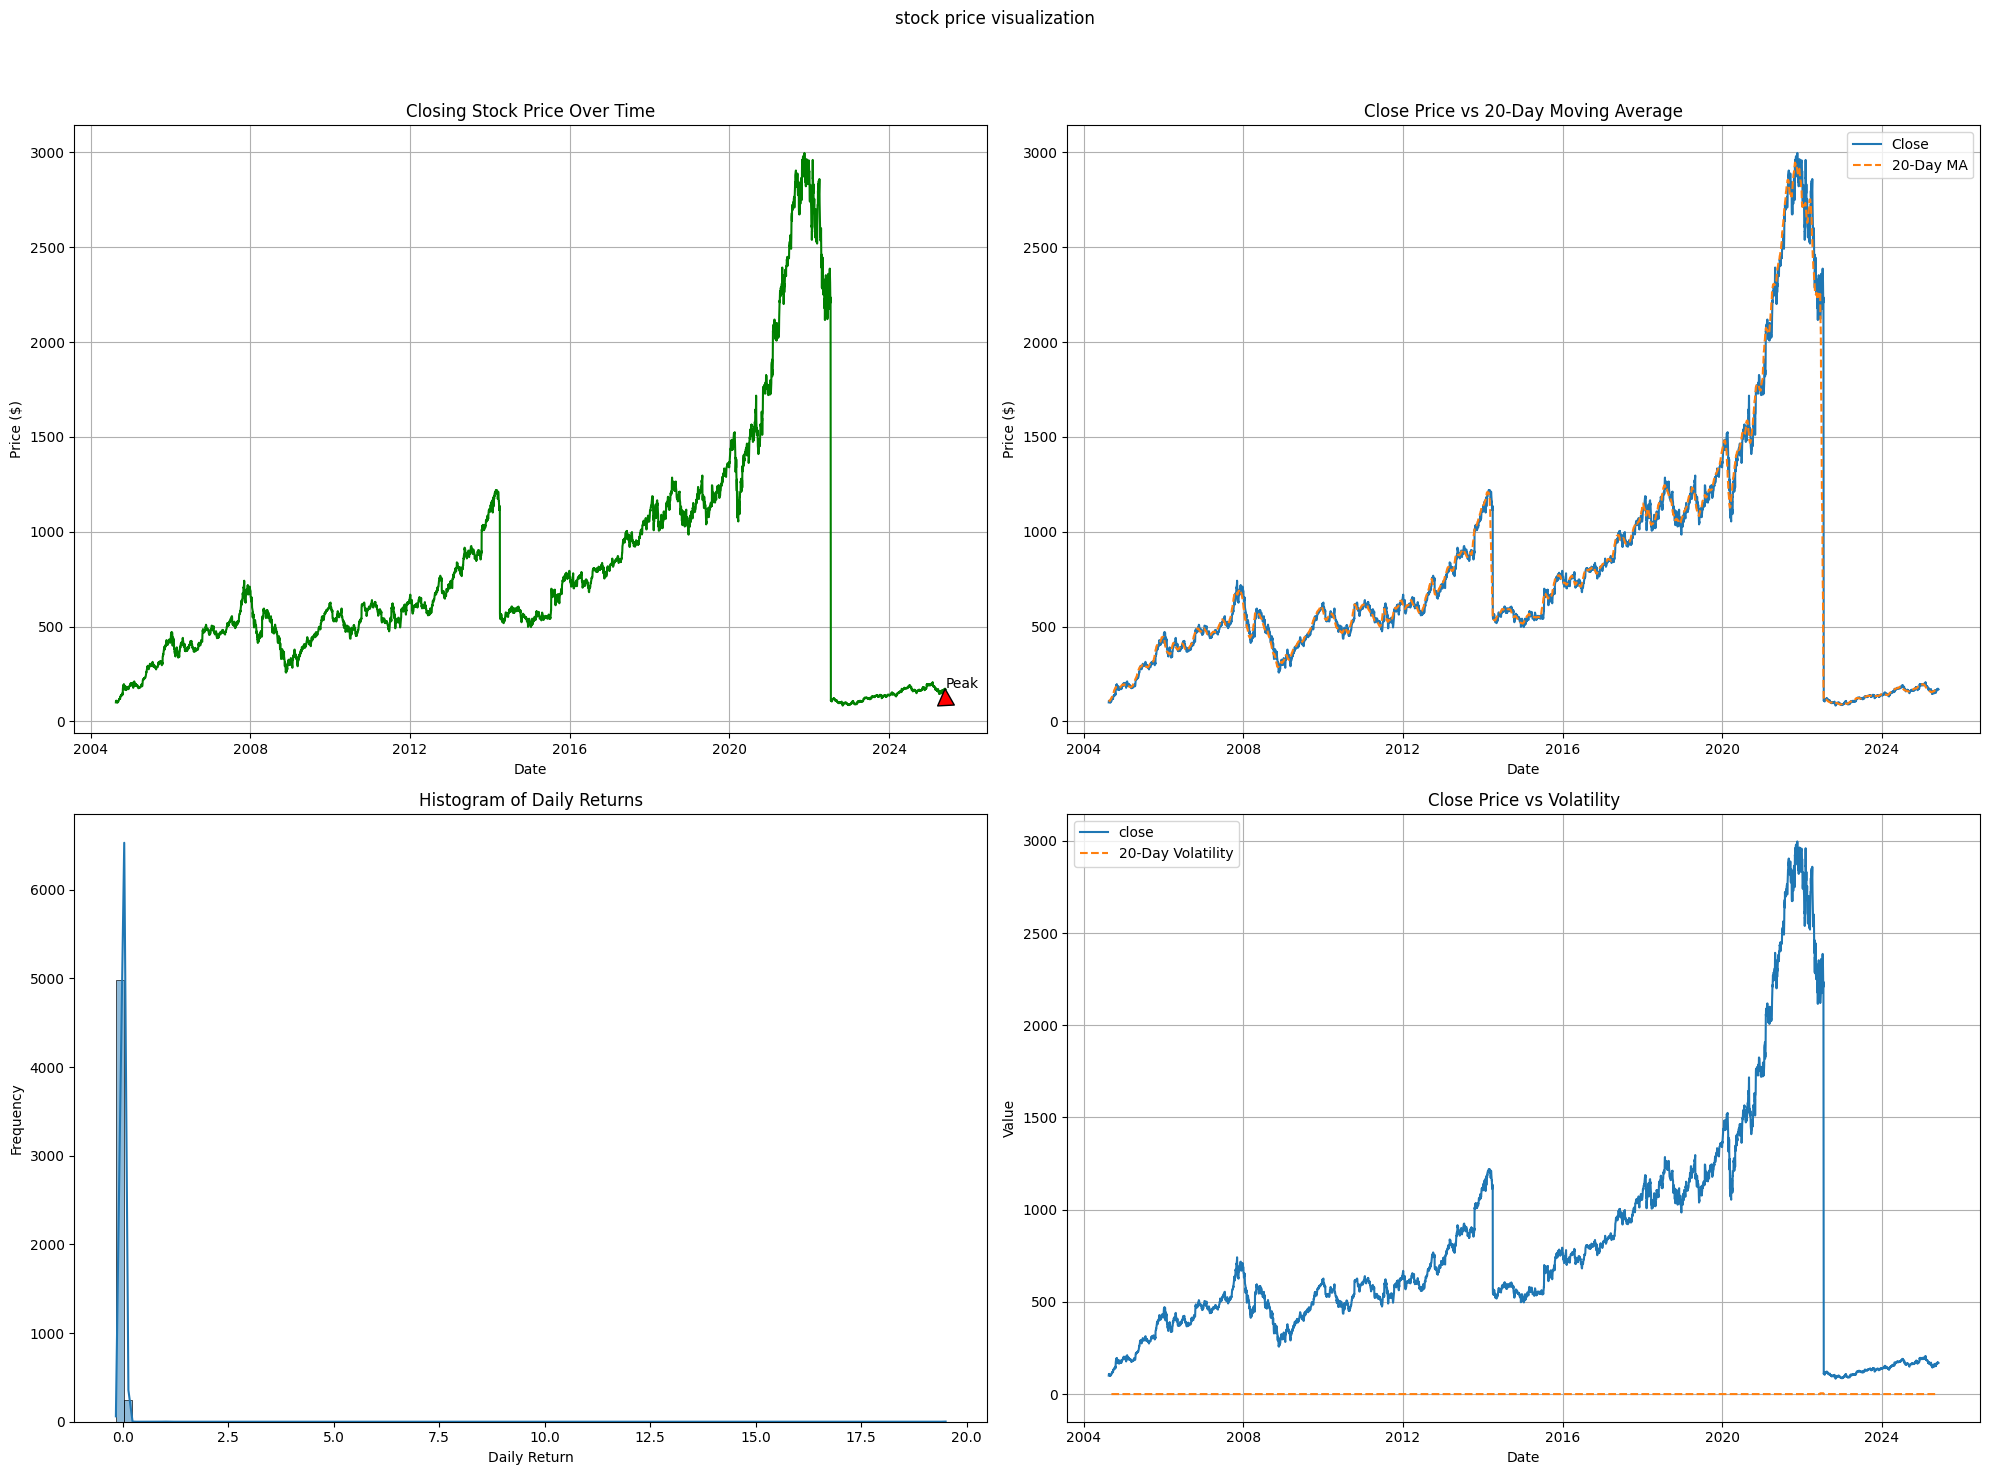

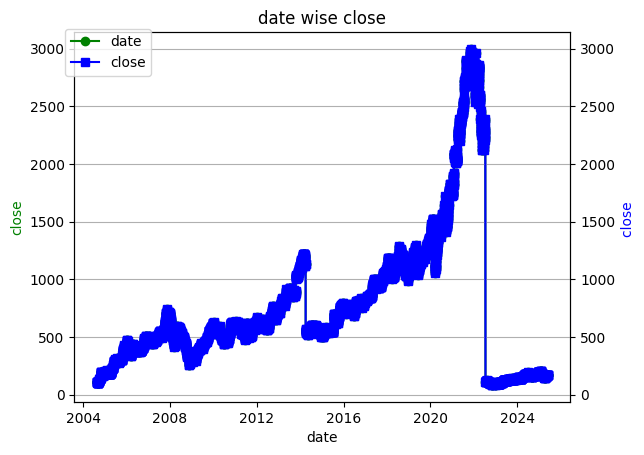

In [11]:
        
        fig, axs = plt.subplots(2, 2, figsize=(20, 15))
        fig.suptitle("stock price visualization")
       
        # Closing price
        axs[0, 0].plot(df['date'],df['close'],color='green')
        axs[0, 0].set_title("Closing Stock Price Over Time")
        axs[0, 0].annotate("Peak", xy=(df['date'].iloc[3], df['close'].iloc[3]),
                           xytext=(df['date'].iloc[2], df['close'].iloc[3]+5),
                           arrowprops=dict(facecolor='red', shrink=0.05))
        axs[0, 0].set_xlabel("Date")
        axs[0, 0].set_ylabel("Price ($)")
        axs[0, 0].grid(True)

        # Close vs Moving Average
        axs[0, 1].plot(df['date'], df['close'], label='Close')
        axs[0, 1].plot(df['date'], df['moving_avg_20'], label='20-Day MA', linestyle='--')
        axs[0, 1].legend()
        axs[0, 1].set_title("Close Price vs 20-Day Moving Average")
        axs[0, 1].set_xlabel("Date")
        axs[0, 1].set_ylabel("Price ($)")
        axs[0, 1].grid(True)

        # Histogram of Daily Returns
        sns.histplot(df['daily_return'].dropna(), bins=100, kde=True, ax=axs[1, 0])
        axs[1, 0].set_title("Histogram of Daily Returns")
        axs[1, 0].set_xlabel("Daily Return")
        axs[1, 0].set_ylabel("Frequency")

        # Volatility plot
        axs[1, 1].plot(df['date'], df['close'], label='close')
        axs[1, 1].plot(df['date'], df['volatility_20'], label='20-Day Volatility', linestyle='--')
        axs[1, 1].legend()
        axs[1, 1].set_title("Close Price vs Volatility")
        axs[1, 1].set_xlabel("Date")
        axs[1, 1].set_ylabel("Value")
        axs[1, 1].grid(True)

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        ax1.plot(df["date"],df["close"], "g-o",label="date")
        ax2.plot(df["date"],df["close"], "b-s",label="close")

        ax1.set_xlabel("date")
        ax1.set_ylabel("close", color='g')
        ax2.set_ylabel("close ", color='b')

        plt.title("date wise close")

        fig.legend(loc="upper left",bbox_to_anchor=(0.1,0.9))

        plt.grid(True)
        plt.show()

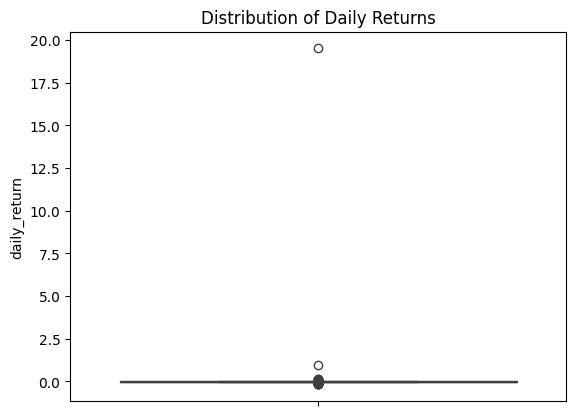

In [36]:
sns.boxplot(y='daily_return', data=df)
plt.title("Distribution of Daily Returns")
plt.show()


<Axes: >

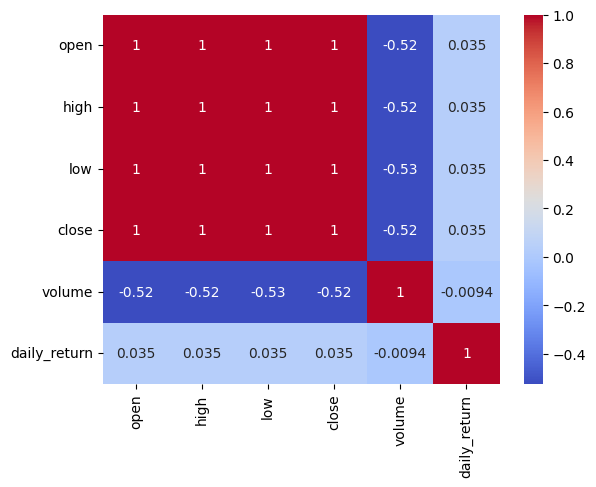

In [14]:
sns.heatmap(df[['open', 'high', 'low', 'close', 'volume', 'daily_return']].corr(),annot=True, cmap='coolwarm')

 ## ML model

In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime, timedelta
from datetime import date
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [18]:
window_size = 5
X, y = [], []

for i in range(len(df) - window_size):
    X.append(df['close'].iloc[i:i+window_size].values)
    y.append(df['close'].iloc[i + window_size])

X = np.array(X)  # shape: (samples, 5)
y = np.array(y)  # shape: (samples,)

X = np.array(X).reshape(-1, 5)  # from (135, 5, 1) ➝ (135, 5)
y = np.array(y).reshape(-1)     # from (135, 1) ➝ (135,)

# Step 3: Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=int(len(df) * 0.8), shuffle=False)

# Step 4: Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [19]:
last_5 = df['close'].iloc[-5:].values.reshape(1, -1)  # shape: (1, 5)
predicted_price = np.round(model.predict(last_5)[0], 2)

# Step 6: Compare with today's close
last_close = float(df['close'].iloc[-1])
change_pct = np.round(((predicted_price - last_close) / last_close) * 100, 2)
symbol = "↑" if change_pct > 0 else "↓"

print(f"\npredicted price of : ${predicted_price} ({symbol}{abs(change_pct)}%)")



predicted price of : $98.53 (↓1.8%)


## Real time insights and prediction 

What is tomorrow’s predicted closing price? AAPL: $183.75 (↑1.2%)

In [20]:
# Step 1: Download data
ticker = "AAPL"
start_date = "2024-12-01"
end_date = datetime.today().strftime("%Y-%m-%d")

data1 = yf.download(ticker, start=start_date, end=end_date)
data1.reset_index(inplace=True)
df1 = data1[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Close'] = np.round(df1['Close'].values, 2)

# Step 2: Create sliding window dataset
window_size = 5
X, y = [], []

for i in range(len(df1) - window_size):
    X.append(df1['Close'].iloc[i:i+window_size].values)
    y.append(df1['Close'].iloc[i + window_size])

X = np.array(X)  # shape: (samples, 5)
y = np.array(y)  # shape: (samples,)

X = np.array(X).reshape(-1, 5)  # from (135, 5, 1) ➝ (135, 5)
y = np.array(y).reshape(-1)     # from (135, 1) ➝ (135,)

# Step 3: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# Step 4: Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Predict tomorrow's price using last 5 closes
last_5 = df1['Close'].iloc[-5:].values.reshape(1, -1)  # shape: (1, 5)
predicted_price = np.round(model.predict(last_5)[0], 2)

# Step 6: Compare with today's close
last_close = float(df1['Close'].iloc[-1])
change_pct = np.round(((predicted_price - last_close) / last_close) * 100, 2)
symbol = "↑" if change_pct > 0 else "↓"

# Step 7: Output
print(f"\nTomorrow predicted price of {ticker}: ${predicted_price} ({symbol}{abs(change_pct)}%)")


# Today's close
df1['Date_only'] = df1['Date'].dt.date
today = date.today()
today_close = df1[df1['Date_only'] == today]['Close']

if not today_close.empty:
    print(f"Today's Close ({today}): ${today_close.values[0]}")
else:
    print(f"No closing data available for today ({today})")


[*********************100%***********************]  1 of 1 completed



Tomorrow predicted price of AAPL: $197.9 (↓1.58%)
No closing data available for today (2025-06-30)


What was the prediction error over the past 7 days?	RMSE: $2.10, MAE: $1.74

In [21]:
if len(y_test) >= 7:
    y_pred_last7 = model.predict(X_test[-7:])
    rmse_7 = np.sqrt(mean_squared_error(y_test[-7:], y_pred_last7))
    mae = mean_absolute_error(y_test[-7:], y_pred_last7)
   
    print(f"\n📉 Prediction Error (Last 7 Days):")
    print(f"RMSE: {round(rmse_7, 2)}")
    print(f"MAE:  {round(mae, 2)}")


📉 Prediction Error (Last 7 Days):
RMSE: 3.59
MAE:  3.48


How confident is the model in its prediction? Confidence Score: 0.82



In [22]:
# Predict from all trees
all_preds = [tree.predict(last_5)[0] for tree in model.estimators_]

# Confidence = low std → high confidence
std_dev = np.std(all_preds)
confidence_score = round(1 - std_dev / np.mean(all_preds), 2)  # Normalize

print(f"Confidence Score: {confidence_score}")


Confidence Score: 0.98


Is price expected to increase or decrease? "Increase (Buy)"

In [23]:
if predicted_price > last_close:
    decision = "Increase (Buy)"
elif predicted_price < last_close:
    decision = "Decrease (Sell)"
else:
    decision = "No Change (Hold)"

print(f"\n🧠 Model Prediction:")
print(f"Today’s Close:     ${last_close}")
print(f"Tomorrow’s Close:  ${predicted_price}")
print(f"Expected Move:     {decision}")


🧠 Model Prediction:
Today’s Close:     $201.08
Tomorrow’s Close:  $197.9
Expected Move:     Decrease (Sell)


What time of day sees the highest price fluctuation?	9:30 AM - 11:00 AM EST

In [24]:
ticker = "AAPL"
interval = "5m"  
period = "5d"    

data = yf.download(ticker, period=period, interval=interval)
data = data.reset_index()
data['Datetime'] = pd.to_datetime(data['Datetime'])

data['Time'] = data['Datetime'].dt.time

# ✅ Calculate intraday price range (volatility)
data['Range'] = data['High'] - data['Low']

# ✅ Group by time and take average range
avg_range_by_time = data.groupby('Time')['Range'].mean().sort_values(ascending=False)

# ✅ Find time with highest average fluctuation
most_volatile_time = avg_range_by_time.idxmax()
max_range = round(avg_range_by_time.max(), 2)

print(f"\n⏱️ Highest Avg. Price Fluctuation Time: {most_volatile_time} with range ${max_range}")


[*********************100%***********************]  1 of 1 completed


⏱️ Highest Avg. Price Fluctuation Time: 13:30:00 with range $1.54


What are the top 3 buy recommendations today? MSFT, NVDA, TSLA

In [25]:
def get_prediction(ticker):
    df = yf.download(ticker, start="2022-01-01", end=datetime.today().strftime("%Y-%m-%d"))[['Close']]
    df['Close'] = df['Close'].round(2)
    
    # Prepare sliding-window data
    window = 5
    X, y = [], []
    for i in range(window, len(df)):
        X.append(df['Close'].iloc[i-window:i].values)
        y.append(df['Close'].iloc[i])
    X = np.array(X).reshape(-1, 5)  # from (135, 5, 1) ➝ (135, 5)
    y = np.array(y).reshape(-1)     # from (135, 1) ➝ (135,)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    last5 = df['Close'].iloc[-5:].values.reshape(1, -1)
    pred = model.predict(last5)[0]
    last = df['Close'].iloc[-1]
    print(last)
    pct = (pred - last)/last*100
    
    return round(pct, 2)
a=get_prediction(ticker)
n=get_prediction('NVDA')
m=get_prediction('MSFT')
t=get_prediction('TSLA') 
a,n,m,t

[*********************100%***********************]  1 of 1 completed


Ticker
AAPL    201.08
Name: 2025-06-27 00:00:00, dtype: float64


[*********************100%***********************]  1 of 1 completed


Ticker
NVDA    157.75
Name: 2025-06-27 00:00:00, dtype: float64


[*********************100%***********************]  1 of 1 completed


Ticker
MSFT    495.94
Name: 2025-06-27 00:00:00, dtype: float64


[*********************100%***********************]  1 of 1 completed


Ticker
TSLA    323.63
Name: 2025-06-27 00:00:00, dtype: float64


(Ticker
 AAPL   -1.43
 Name: 2025-06-27 00:00:00, dtype: float64,
 Ticker
 NVDA   -15.92
 Name: 2025-06-27 00:00:00, dtype: float64,
 Ticker
 MSFT   -8.1
 Name: 2025-06-27 00:00:00, dtype: float64,
 Ticker
 TSLA    2.21
 Name: 2025-06-27 00:00:00, dtype: float64)

What is the 7-day and 30-day moving average?

In [26]:
df1['MA7'] = df1['Close'].rolling(window=7).mean()
df1['MA30'] = df1['Close'].rolling(window=30).mean()

print(f"Latest 7-day MA: {round(df1['MA7'].iloc[-1],2)}")
print(f"Latest 30-day MA: {round(df1['MA30'].iloc[-1],2)}")


Latest 7-day MA: 200.43
Latest 30-day MA: 201.55


 Any buy signal based on moving average crossover?

In [27]:
if df1['MA7'].iloc[-1] > df1['MA30'].iloc[-1] and df['MA7'].iloc[-2] <= df1['MA30'].iloc[-2]:
    print("📈 Buy signal (7-day MA crossed above 30-day MA)")
elif df1['MA7'].iloc[-1] < df1['MA30'].iloc[-1] and df1['MA7'].iloc[-2] >= df1['MA30'].iloc[-2]:
    print("📉 Sell signal (7-day MA crossed below 30-day MA)")
else:
    print("No crossover signal today.")


No crossover signal today.


Top N days with highest volume (activity)?

In [30]:
top_vol = df1.sort_values(('Volume', 'AAPL'), ascending=False).head(3)
print("🔊 Top 3 days with highest volume:")
print(top_vol[[('Date', ''), ('Volume', 'AAPL')]])


🔊 Top 3 days with highest volume:
Price        Date     Volume
Ticker                  AAPL
87     2025-04-09  184395900
85     2025-04-07  160466300
14     2024-12-20  147495300


When was the last big spike/drop in price?

In [32]:

df1[('Daily_Change%', '')] = df1[('Close', 'AAPL')].pct_change() * 100

spike_day = df1.loc[df1[('Daily_Change%', '')].abs().idxmax()]

print(f"⚡ Largest price change: {round(spike_day[('Daily_Change%', '')], 2)}% on {spike_day[('Date', '')].date()}")


⚡ Largest price change: 15.33% on 2025-04-09


 Daily Price Range and Average Range

In [33]:
df1['Range'] = df1['High'] - df1['Low']
avg_range = df1['Range'].tail(7).mean()
print(f"📊 Average Daily Range (last 7 days): ${avg_range:.2f}")


📊 Average Daily Range (last 7 days): $3.34


Return Correlation with Other Stocks

In [34]:
stocks = ['AAPL', 'MSFT', 'NVDA']
data2 = yf.download(stocks, start="2024-01-01")['Close']
corr = data2.pct_change().corr()

print("🔗 Correlation Matrix (Daily Returns):")
print(corr)


[*********************100%***********************]  3 of 3 completed

🔗 Correlation Matrix (Daily Returns):
Ticker      AAPL      MSFT      NVDA
Ticker                              
AAPL    1.000000  0.549670  0.379999
MSFT    0.549670  1.000000  0.565182
NVDA    0.379999  0.565182  1.000000


Plot Actual vs Predicted Prices

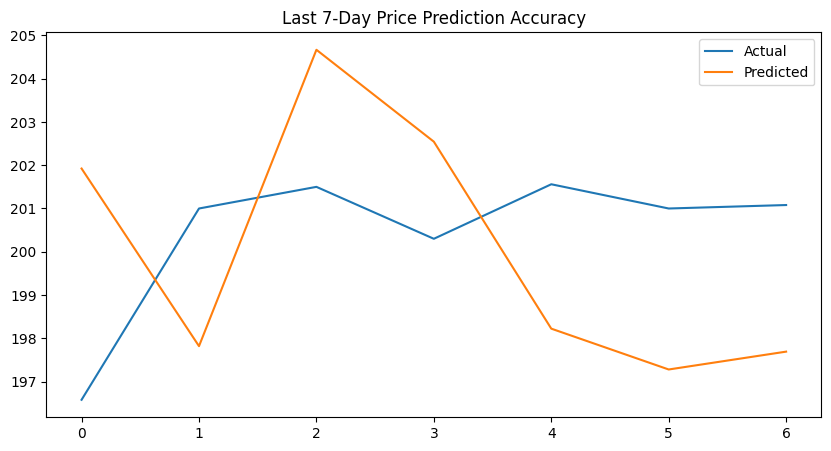

In [35]:

plt.figure(figsize=(10,5))
plt.plot(y_test[-7:], label='Actual')
plt.plot(y_pred_last7[-7:], label='Predicted')
plt.title("Last 7-Day Price Prediction Accuracy")
plt.legend()
plt.show()
